# Autoencoders - Fashion MNIST Dataset

Autoencoders are neural networks designed to copy inputs (**encode**) to matching outputs (**decode**). They use an unsupervised learning technique to learn how to represent data and extract relevant information, allowing the model to reconstruct inputs even if there is some sort of noise in evaluated data.

This notebook shows how to use Keras to create an Autoencoder that can process the Fashion MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Keras is an open-source deep-learning framework written in Python. We can use it to build and evaluate deep learning models.

* **Step 1 - Importing dependencies**



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

* **Step 2 - Loading and normalizing the dataset**


In [23]:
# First, we load the Fashion MNIST dataset. It is necessary to split train and test data.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

# Next, we normalize pixel values to have them between 0 and 1.
valMax = x_train.max()

x_train = x_train / valMax
x_test = x_test / valMax

# Images are represented by 28x28 pixel images. It is necessary to transform images into unidimensional arrays containing 784 pixels before processing them.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# To guarantee the autoencoder can reconstruct inputs even if there is noise, let's manually apply some noise to our data.
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


* **Step 3 - Visualizing images before training the model**



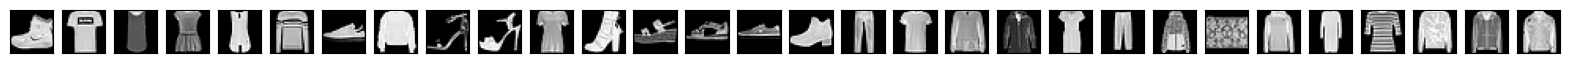

In [24]:
# Showing some of the original images
n = 30
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

* **Step 4 - Building the Autoencoder using original data**



In [25]:
# Defines the dimensionality for encoding
n_latent = 60

# Created the Autoencoder model
model = Sequential()
model.add(Dense(units = 400, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = n_latent, activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = 400, activation="relu"))
model.add(Dense(units = x_train.shape[1], activation="sigmoid"))

# Compiles the model
model.compile(optimizer='adam', loss='binary_crossentropy')

* **Step 5 - Trains the model the using imagens and validates it using data without noise**



In [26]:
# Trains the autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encodes and decodes images without noise
encoded_imgs = model.predict(x_test)

Epoch 1/30
235/235 [==============================] - 10s 36ms/step - loss: 0.3523 - val_loss: 0.3098
Epoch 2/30
235/235 [==============================] - 9s 37ms/step - loss: 0.2989 - val_loss: 0.2955
Epoch 3/30
235/235 [==============================] - 8s 33ms/step - loss: 0.2904 - val_loss: 0.2893
Epoch 4/30
235/235 [==============================] - 9s 38ms/step - loss: 0.2854 - val_loss: 0.2854
Epoch 5/30
235/235 [==============================] - 9s 39ms/step - loss: 0.2821 - val_loss: 0.2828
Epoch 6/30
235/235 [==============================] - 8s 32ms/step - loss: 0.2796 - val_loss: 0.2826
Epoch 7/30
235/235 [==============================] - 9s 39ms/step - loss: 0.2778 - val_loss: 0.2793
Epoch 8/30
235/235 [==============================] - 9s 40ms/step - loss: 0.2764 - val_loss: 0.2781
Epoch 9/30
235/235 [==============================] - 8s 33ms/step - loss: 0.2752 - val_loss: 0.2771
Epoch 10/30
235/235 [==============================] - 9s 39ms/step - loss: 0.2741 - val_l

* **Step 6 - Shows a graph to compare original and rebuilt images without noise**



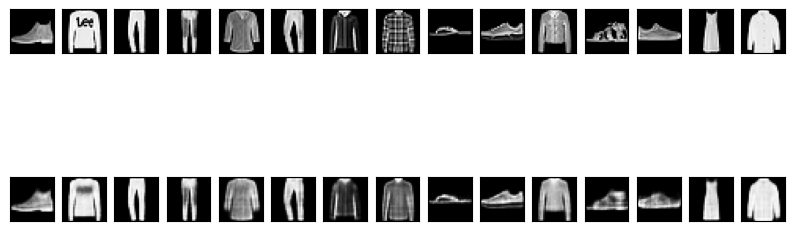

In [27]:
# Shows 15 images without noise
n = 15
plt.figure(figsize=(10, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rebuilt image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

* **Step 7 - Validates data with noise**

In [28]:
# Encodes and decodes images with noise
encoded_imgs = model.predict(x_test_noisy)

313/313 [==============================] - 1s 4ms/step


* **Step 8 - Shows a graph to compare original and rebuilt images with noise**

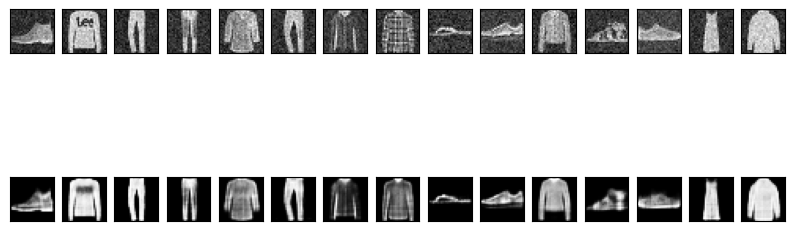

In [29]:
# Shows 15 images witho noise
n = 15
plt.figure(figsize=(10, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rebuilt image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

* **Step 9 - Creates a classification model to test noisy inputs, original imagens, and rebuilt images**

In [30]:
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
model2.add(Dense(units=100, activation='relu'))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 [==============================] - 4s 12ms/step - loss: 0.5418 - accuracy: 0.8103
Epoch 2/40
235/235 [==============================] - 3s 12ms/step - loss: 0.3805 - accuracy: 0.8643
Epoch 3/40
235/235 [==============================] - 4s 18ms/step - loss: 0.3394 - accuracy: 0.8760
Epoch 4/40
235/235 [==============================] - 3s 12ms/step - loss: 0.3100 - accuracy: 0.8866
Epoch 5/40
235/235 [==============================] - 3s 12ms/step - loss: 0.2883 - accuracy: 0.8946
Epoch 6/40
235/235 [==============================] - 3s 12ms/step - loss: 0.2757 - accuracy: 0.8985
Epoch 7/40
235/235 [==============================] - 4s 15ms/step - loss: 0.2626 - accuracy: 0.9021
Epoch 8/40
235/235 [==============================] - 4s 15ms/step - loss: 0.2461 - accuracy: 0.9080
Epoch 9/40
235/235 [==============================] - 3s 12ms/step - loss: 0.2373 - accuracy: 0.9116
Epoch 10/40
235/235 [==============================] - 3s 12ms/step - loss: 0.2286 - accura

In [32]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nAccuracy test - no noise: %.1f%%" % (100.0 * acc))

loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nAccuracy test - noisy images: %.1f%%" % (100.0 * acc))

loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nAccuracy test - rebuilt images with noise: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8940

Accuracy test - no noise: 89.4%
313/313 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.8741

Accuracy test - noisy images: 87.4%
313/313 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.8590

Accuracy test - rebuilt images with noise: 85.9%


* **Step 10 - Display metrict using Sklearn**

313/313 [==============================] - 1s 2ms/step
Evaluating the classification
Accuracy: 0.894
Mean Squared Error:  1.483
Confusion matrix of samples not used in training:
 [[883   0  13  22   5   2  70   0   5   0]
 [  6 975   2   9   4   0   2   0   2   0]
 [ 16   1 800   6  99   1  72   0   5   0]
 [ 20   8  17 873  56   0  20   0   6   0]
 [  0   0  66  15 862   0  52   0   5   0]
 [  0   0   0   1   0 972   0  11   0  16]
 [149   1  74  28  68   0 675   0   5   0]
 [  0   0   0   0   0  14   0 950   0  36]
 [  4   2   2   3   4   2   2   2 978   1]
 [  0   0   0   0   0   5   1  22   0 972]]

Classification Report of samples not used in training:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.91      0.87      0.89      1000
           4       0.79      0.86      0.82      1000
         

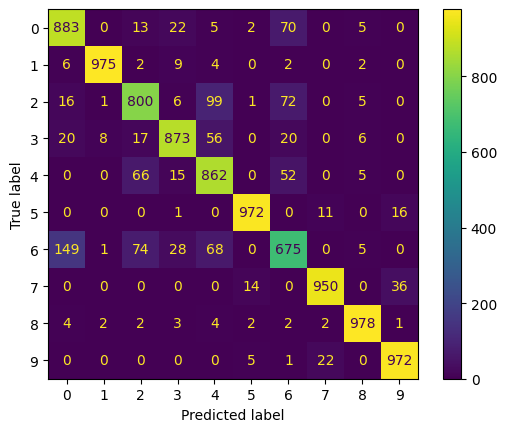

In [33]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

y_pred = model2.predict(x_test)

#Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Evaluating the classification")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"Confusion matrix of samples not used in training:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Classification Report of samples not used in training:")
print(relatorio)

print(f"Confusion matrix of samples not used in training:\n {confusion_matrix(y_test, y_pred)}")
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()